# Submission - Exercises sheet 1
MA-INF 4236 - Advanced Methods for Text Mining, So24<br>
Yara Elwakeel 50135730<br>
Aksa Aksa 50146305<br>
May 15, 2024<br>

# 1. Preprocessing 

## 1.1 concpts 

1. ### Sentence tokenization
    A tokenizer segments the text into sentences. As once a text is divided into sentences, 
    it becomes easier to analyze the grammatical structure and syntax of each sentence.
    It identifies the boundaries of sentences in a given text. Typically, sentences end with punctuation marks (eg, "?", ",", ".") as they are keys of sentence boundaries.
    This is crucial for tasks such as grammatical analysis and dependency parsing. Additionally, it improves efficiency as Working with individual sentences rather than large blocks of text enables a more focused analysis, as each sentence can be processed separately.
    
2. ### Word Tokenization 
    It decomposes each text string into a sequence of words (technically tokens) for computational analysis. Where it allows for further analysis and manipulation of the text, such as lemmatization, stemming, or part-of-speech tagging.
    in addition, tokenization is often the first step in preparing data for training. It ensures that the data is in a structured format suitable for modeling.
    NLTK has module word_tokenize() which uses a default tokenizer that can handle different types of punctuation and language nuances to correctly split the text into words.
    
3. ### Part-of-speech (POS) tagging
    Part of Speech (POS) Tagging aims at assigning each word of a text the proper syntactic tag in its context of appearance. also called grammatical tagging, it can be seen as a grammatical classification that includes verbs, adjectives, adverbs, nouns, etc. it's an essential step in many NLP tasks as it provides grammatical structure and syntactic information about the text. as a word meaning is dependent on it's POS and it's context. especially in machine translation, information retrieval , named entity recognition as it helps identify PROPN and named entities and Text-to-speech as it also includes cues for correct pronunciation and inflection.<br>
    Several POS tagging approaches have been proposed to automatically tag words with part-of-speech tags in a sentence. The most familiar approaches are rule-based where uses hand-crafted rules to assign tags to words in a sentence, artificial neural network Uses neural network architectures such as RNN to assign POS tags ,a stochastic is a statistical method that uses probability and statistics to determine the most likely POS tag for a given word based on its context(e.g hidden markov models(HMM) or conditional random fields(CRF) ) . and a hybrid approach which combines different methodologies, such as rule-based and stochastic methods, to take advantage of the strengths of each method and improve performance.[2]

    
4. ### Lemmetization 
    The goal is to normalize different inflected forms of a word  Lemmatization is a natural language processing (NLP) technique that groups words based on their lemma, or base form, by removing inflectional morphemes. where an inflectional morpheme is a bound morpheme added to a word to indicate grammatical properties. In addition, Lemmatization takes into account the part of speech (POS) of a word, such as noun, verb, adjective, or adverb, so that they can be analyzed or compared more easily. In Python, the WordNetLemmatizer class from the Natural Language Toolkit (NLTK) leverages the WordNet lexical database to lemmatize each word in an input sentence according to its POS tag.The lemmatizer can also be applied to individual words, mapping them to a single, most common lemma, or providing different lemmas based on the specified POS tag. For instance, the word "leaves" can have the lemma "leave" (verb) or "leaf" (noun), Lemmatization is especially useful for parsing languages like Turkish and Arabic, where grammatical relationships such as subject, verb, and object are indicated by changes in the words themselves. . [1, p. 526]
5. ### Stop words removal
    Stop words refer to the words that do not distinguish one text document from another in the corpus Examples include "the" and "or" because they are extremely common across documents, leading to little distinction among each document.so that text models can focus on the distinctive meaningful words that carry more information thus improving the model's performance , these non distinctive words with high number of occurrences can increase the data dimensionalty which may distort the results of a machine learning algorithm .
    you can use a predefined list of stop words from libraries such as NLTK which possess a list of 127 English stop words, SpaCy , or even create your own custom list based on the used language and applied problem . [1, p. 523]


## 1.2 Implementation 

nltk.word_tokenize()<br> 
operates by breaking down a given text into individual tokens, where each token represents either a word or a punctuation mark. It uses language-specific rules and patterns to identify boundaries between words and punctuation marks, segmenting the input text into a list of tokens

nltk.sent_tokenize()<br> 
The sent_tokenize function uses an instance of PunktSentenceTokenizer from the nltk.tokenize.punkt module, which is pretrained and thus very well knows to 
identify the boundaries of sentences in a given text using what characters and punctuation.  

nlkt.WordNetLemmatizaer()<br>
The WordNetLemmatizer uses the WordNet lexical database to find the lemma of a word. WordNet contains a large corpus of words and their relationships, including synonyms, hypernyms, hyponyms, and other linguistic information.

nltk.corpus.stopwords()<br>
is a function provided by the NLTK library that returns a set of commonly used stopwords for the English language

In [1]:
from nltk import *
download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\yarae\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [4]:
def process_paragraph(paragraph):
    # split the paragraph into sentences. 
    split_sent = tokenize.sent_tokenize(paragraph)
    

    # initialize wordNet lemmatizer
    wnl = WordNetLemmatizer()
    # get english stopwords 
    stopwords = set(corpus.stopwords.words('english'))
    proc_sent = []
    
    for sent in split_sent:
        # applies word tokenization 
        tokens = word_tokenize(sent.lower())

         # apply lemmetaization on all words 
        lemma  = [wnl.lemmatize(t) for t in tokens]
        
        # remove stopewords from the predefined set of stopwords 
        re_st =  [l for l in lemma if l not in stopwords]

        proc_sent.append(re_st)


    return proc_sent

proc_sent = process_paragraph('NLTK is a leading platform. for building Python programs to work with human language data. It provides easy-to-use interfaces to over 50 corpora and lexical resources such as WordNet, along with a suite of text processing libraries for classification, tokenization, stemming, tagging, parsing, and semantic reasoning, wrappers for industrial-strength NLP libraries.')
print(proc_sent)

[['nltk', 'leading', 'platform', '.'], ['building', 'python', 'program', 'work', 'human', 'language', 'data', '.'], ['provides', 'easy-to-use', 'interface', '50', 'corpus', 'lexical', 'resource', 'wordnet', ',', 'along', 'suite', 'text', 'processing', 'library', 'classification', ',', 'tokenization', ',', 'stemming', ',', 'tagging', ',', 'parsing', ',', 'semantic', 'reasoning', ',', 'wrapper', 'industrial-strength', 'nlp', 'library', '.']]


# 2. Algebra Basics

### **describe briefly**

1. **What is a vector?**  
    A vector is a mathematical object used to describe both magnitude and direction. It is represented only by its magnitude and direction and is an element of a vector space.

2. **What is a matrix?**  
    A matrix is a rectangular array of numbers arranged in rows and columns. In the context of vectors, matrices are used to represent a collection of vectors and to perform linear transformations on vectors (e.g., rotation, scaling, shearing). 
    Matrices enable us to represent, manipulate, and transform vectors in multidimensional spaces.

3. **What is the rank of a matrix?**  
    The rank of a matrix represents the number of linearly independent vectors it contains. It includes both row rank and column rank, which are always equal. In the context of vectors and vector spaces, linearly independent vectors form a basis for the vector space, providing a minimal set of vectors to express any vector through linear combinations. 
    In machine learning, the rank of a matrix represents the number of dimensions (features) present in the data that provide useful information.

4. **What is outer product expansion?**  
    Outer product expansion involves taking each element of one vector and multiplying it by each element of another vector. The result is a matrix with dimensions determined by the lengths of the input vectors. When performed on matrices, it involves taking the outer product of the columns or rows of one matrix with the columns or rows of another matrix.

5. **What is cosine similarity?**  
    Cosine similarity is a mathematical method that is used to measure the similarity between vectors. In its essence, it is a normalized dot product, where the dot product is the projection of one vector onto another scaled by the lengths of the vectors and the cosine of the angle between them. The larger the dot product, the more aligned the vectors are with each other.

    $$
    a \cdot b = \|a\| \|b\| \cos(\theta)
    $$


    However, this scale is highly influenced by the vectors' magnitudes. That's why cosine similarity is used, as it's normalized by the product of the vectors' norms, thus taking into account also the orientation between vectors.
"
    $$
    \cos(\theta) = \frac{ a \cdot b} { \|a\| \|b\|} 
    $$


    In the context of NLP, cosine similarity is commonly used to measure the similarity between word embeddings, enabling tasks such as document similarity, information retrieval, and clustering.


### **Describe in a few sentences the concept of the gradient of a vector or matrix**

The gradient of a vector or matrix extends the concept of the derivative to multivariable functions. It provides valuable information about the direction and rate of change of the function in each dimension of its input space. By computing the gradient, we can identify the direction in which the function increases most rapidly and use this information for optimization tasks, such as finding the minimum or maximum values of the function. In machine learning and optimization algorithms, the gradient plays a crucial role in guiding the search for optimal solutions.

### **Explain briefly a linear classifier**
A linear classifier is a machine learning method used in binary classification tasks, where it divides data points in the feature space depending on a decision boundary function. The decision boundary function is represented by the equation:

$$
c(x) = v^T x + v_0 
$$

Here,  $v$  is a vector containing weights for each feature in the input data. Each element represents the importance of the corresponding feature to the classification decision. It determines the orientation of the decision boundary in the feature space. While $V_0$ is a constant value added to the weighted sum of input features to shift the decision boundary in a linear classifier. It determines the position of the boundary in the feature space.

This decision boundary splits the vector space into two parts depending on our label: $c_x = C_1$ if $ c(x) > 0 $ and $ c_x $ is a $ C_2 $ class label if $ c(x) < 0 $

We can rephrase by simplifying equation in \ref{eq:linear_classifier} by concatenating $ V_0 $ with $ V $ values:

$$
W^T = ([v_0,] \circ v)^T
$$

And to compensate for this change, we also concatenate a vector of ones to the start of our input:

$$
X =  (1 \circ x) 
$$
From  the above Equations, we obtain:
$$
c(X) = W^T X 
$$

# 3. Logistic Regression

## 3.1 Model Formulation

We have three variable/features in predicting whether an email is spam or not: `Contacted`, `Colleague`, and `Neither`. Since `Neither` is the base level, it is not included as a separate variable.
So,

\begin{equation}
X =  [x_1, x_2]   
\end{equation}

Logistic Regression Equation:
\begin{equation}
ln(p/1-p) =  \beta_0 + \beta_1x_1 + \beta_2x_2   
\end{equation}

where,

β₀ is the intercept

β₁ is the coefficient for emails from colleague relative to the base level `Neither`

β₂ is the coefficient for emails from contacted non-colleagues relative to the base level `Neither`

We have the following three cases:

1.   Colleague Case:
\begin{aligned}
x_1 = 1\\
x_2 = 0
\end{aligned}
then

\begin{aligned}
ln(p/1-p) =  \beta_0 + \beta_1(1) + \beta_2(0)\\
ln(p/1-p) =  \beta_0 + \beta_1
\end{aligned}


2.   Contacted Case:
\begin{aligned}
x_1 = 0\\
x_2 = 1
\end{aligned}
then

\begin{aligned}
ln(p/1-p) =  \beta_0 + \beta_1(0) + \beta_2(1)\\
ln(p/1-p) =  \beta_0 + \beta_2
\end{aligned}


3.  Neither case
\begin{aligned}
x_1 = 0\\
x_2 = 0
\end{aligned}
then

\begin{aligned}
ln(p/1-p) =  \beta_0 + \beta_1(0) + \beta_2(0)\\
ln(p/1-p) =  \beta_0
\end{aligned}

## 3.2 Calculating Coefficients

Coefficients:
\begin{equation}
\beta_0, \beta_1, \beta_2
\end{equation}

The values of the parameters can be estimated using the Log-Likelihood, which we want to maximize:


\begin{equation}
l(y, x, \beta) =  \sum_{i}^n y_ilnp_i - (1-y_i)ln(1-p_i)
\end{equation}

Since the closed form solution for the logistic regression is not possible because the likelihood equations involve nonlinear functions of the parameters, we will use the numerical method to estimate the parameters. For this case, we will use the Newton-CG (conjugate gradient), an adaption/extension of the Newton-Raphson method.

In [ ]:
import numpy as np
import pandas as pd
from scipy.optimize import minimize

# Generate the df from the given frequency table
# since neither is base the variable, it is added implicitly, i.e., for neither both colleague and contacted will be 0
data = {
    'Colleague': [1]*11 + [1]*1829 + [0]*98 + [0]*1568 + [0]*999 + [0]*1976,
    'Contacted': [0]*11 + [0]*1829 + [1]*98 + [1]*1568 + [0]*999 + [0]*1976,
    'Spam': [1]*11 + [0]*1829 + [1]*98 + [0]*1568 + [1]*999 + [0]*1976
}
df = pd.DataFrame(data)

df['Intercept'] = 1

#columns to be used / model parameters
columns = ['Intercept', 'Colleague', 'Contacted']

X = df[columns].values
y = df['Spam'].values

def logistic_function(z):
    return 1 / (1 + np.exp(-z))

def log_likelihood(beta, X, y):
    z = np.dot(X, beta)
    return np.sum(y * np.log(logistic_function(z)) + (1 - y) * np.log(1 - logistic_function(z)))

def gradient(beta, X, y):
    z = np.dot(X, beta)
    predictions = logistic_function(z)
    return np.dot(X.T, y - predictions)

# matrix of second derivates
def hessian(beta, X, y):
    z = np.dot(X, beta)
    predictions = logistic_function(z)
    weight_matrix = predictions * (1 - predictions)
    return -np.dot(X.T, weight_matrix[:, np.newaxis] * X)

# initial parameters estimates
initial_params = np.zeros(X.shape[1])

# Optimize by maximizing the log likelihood
output = minimize(fun=lambda beta, X, y: -log_likelihood(beta, X, y),
                  x0=initial_params,
                  args=(X, y),
                  method='Newton-CG',
                  jac=lambda beta, X, y: -gradient(beta, X, y),
                  hess=lambda beta, X, y: hessian(beta, X, y))
print("\t    Coefficients:", ["Intercept", "Colleague", "Contacted"])
print("Values of the Coefficients:", output.x)

	    Coefficients: ['Intercept', 'Colleague', 'Contacted']
Values of the Coefficients: [-0.6820826  -4.43119538 -2.090507  ]


## 3.3 Implementation

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# Generate the df from the given frequency table
# since neither is base the variable, it is added implicitly, i.e., for neither both colleague and contacted will be 0
data = {
    'Colleague': [1]*11 + [1]*1829 + [0]*98 + [0]*1568 + [0]*999 + [0]*1976,
    'Contacted': [0]*11 + [0]*1829 + [1]*98 + [1]*1568 + [0]*999 + [0]*1976,
    'Spam': [1]*11 + [0]*1829 + [1]*98 + [0]*1568 + [1]*999 + [0]*1976
}
df = pd.DataFrame(data)
df.head()

,Colleague,Contacted,Spam
0,1,0,1
1,1,0,1
2,1,0,1
3,1,0,1
4,1,0,1


In [ ]:
X = df[['Colleague', 'Contacted']]
y = df['Spam']

In [ ]:
# Fit the model
model = LogisticRegression()
model.fit(X, y)

LogisticRegression()

In [ ]:
# get the coefficients
coefficients = model.coef_[0]
intercept = model.intercept_[0]
feature_names = ['Colleague', 'Contacted']
coef_df = pd.DataFrame(coefficients, index=feature_names, columns=['Coefficient'])
coef_df.loc['Intercept'] = intercept
print(coef_df)

           Coefficient
Colleague    -4.103004
Contacted    -2.059136
Intercept    -0.691370


There is a minor difference observed between the values of the coefficients calculated using both the methods, which can be primarily attributed to the fact that one, a different method is being used, and second, L2 regularization is being used in the sklearn implementation. As a background work, we also tried turning off the L2 regularization, which actually resulted in the values of coefficients being almost identical for both methods. Moreover, the convergence criteria for both methods can also affect the final values of the coefficients, such as the tolerance or the maximum number of iterations.

## 3.4 Confusion Matrix

In [ ]:
# model prediction
y_pred = model.predict(X)

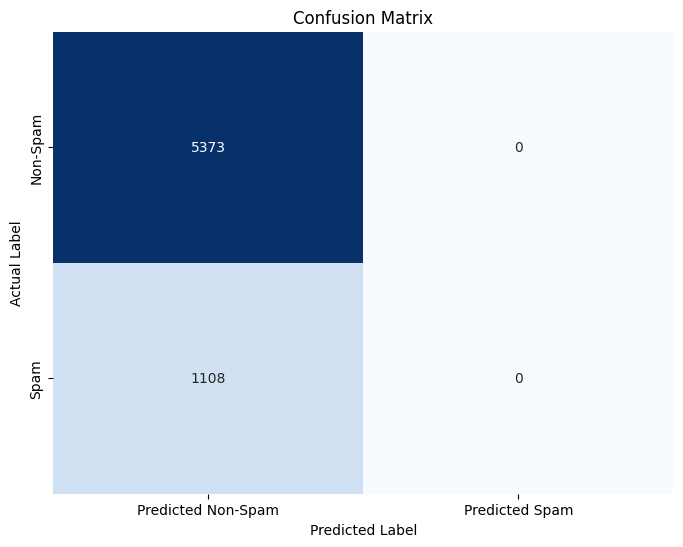

In [ ]:
cm = confusion_matrix(y, y_pred)
cm_df = pd.DataFrame(cm, index=['Non-Spam', 'Spam'], columns=['Predicted Non-Spam', 'Predicted Spam'])
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()

## 3.5 Metrics

**Accuracy**: number of correct predictions (both true positives and true negatives) from the total predictions. A high accuracy doesn't always mean that the model is performing well. It is important to look at other metrics especially if the classes are imbalanced. We get an accuracy of around 82%, but we also have the class imbalance issue. So, this might not be representative.

\begin{equation}
Accuracy= (TP+TN+FP+FN) / (TP+TN)
\end{equation}


**Recall**: how many of the actual positives are correctly identified. Our model has a recall of 0 since it predicts the negative class (non-spam) in all the cases (TP is zero).


\begin{equation}
Recall = (TP) / (TP+FN)
\end{equation}

**Precision**: how many of the predictions are actually correct. Our model has also a precision of 0 since it predicts the negative class (non-spam) in all the cases.


\begin{equation}
Precision = (TP) / (TP+FP)
\end{equation}

**F1 Score**: The harmonic mean of Precision and Recall, providing a balance between the two in cases where one may be significantly higher than the other. 0 since precision and recall is 0.

\begin{equation}
F1 = 2(precision * recall ) / (precision+recall)
\end{equation}




In [ ]:
accuracy = accuracy_score(y, y_pred)
recall = recall_score(y, y_pred, zero_division=0)
precision = precision_score(y, y_pred, zero_division=0)
f1 = f1_score(y, y_pred, zero_division=0)

print("Accuracy:", accuracy)
print("Recall:", recall)
print("Precision:", precision)
print("F1 Score:", f1)

Accuracy: 0.8290387285912668
Recall: 0.0
Precision: 0.0
F1 Score: 0.0


## 3.6 Trustworthiness

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

model = LogisticRegression()
model.fit(X_res, y_res)
y_pred_res = model.predict(X_res)

accuracy_res = accuracy_score(y_res, y_pred_res)
recall_res = recall_score(y_res, y_pred_res)
precision_res = precision_score(y_res, y_pred_res)
f1_res = f1_score(y_res, y_pred_res)
print("Accuracy:", accuracy_res)
print("Recall:", recall_res)
print("Precision:", precision_res)
print("F1 Score:", f1_res)

Accuracy: 0.7700539735715615
Recall: 0.9078726968174204
Precision: 0.711701196381675
F1 Score: 0.7979062730023717


Looking at the frequency table, it can be easily observed that the data is imbalanced, i.e., around 5000 from the not-spam class and only 1100 from the spam class. This issue gets reflected in the above trained logistic regression model.

If we just look at the accuracy of the model (>80%), the model looks quite decent and trustworthy, which is quite misleading at the first sight. Upon looking into more details such as confusion matrix, it can be seen that the model is heavily biased towards the non-spam class. In fact, it classifies each sample as a non-spam, but due to the imbalance, we nevertheless get a very high accuracy.

In reality, the model is not trustworthy and fails to predict the email as spam or not. This could be because regression models rely on the mean and standard deviation. When dealing with skewed data, the mean can be deceptive as the most frequent values in the distribution might not align closely with the mean.

Moreover, the given data only checks the sender of the email, i.e., whether it has been sent by colleague, previously contacted person, or neither. It doesn't look into the content of the email, for example, use of certain words, incorrect grammar etc.


**Possible Solutions**

The model can be improved by addressing the class imbalance issue. For example, oversampling of the minority class using SMOTE (Synthetic Minority Oversampling Technique). This was done as an extra work and it can be observed that the model now performs better by not identifying all samples as non-spam. Another solution could be lowering the threshold from the default 0.5 to classify positive/negative samples. However, this could increase false positives.

**Strengths & Weaknesses**

While the approach certainly has multiple strengths like being very easy to implement and interpret, and also providing a probabilistic outcome which can be quite helpful in thresholding, it clearly lacks the complexity to provide decent results when there are issues like class imbalance. Being able to produce decent results despite class imbalance is important because in most of the practical use cases, class imbalance is present. Moreover, it can be quite prone to overfitting, as was the case in this use case.

# 4.TF-IDF
 TF-IDF stands for The Term Frequency-Inverse Document Frequency is a statistical method that is used to process textual-data that measures how important a word is in a set of documents where it's a scaled down version of bag of words,  it's the result of multiplying of two terms
**Term frequency(TF)**, which measures the frequency of words that appeared in a document ,however to address the variation in document lengths, word frequency is often normalized by the total document length, ensuring fair comparison across documents regardless of their size.
$$
tf_{term} = \frac{number of times a term appears in a documnet}{totall number of terms in the document } 
$$
**Inverse document frequency($IDF$)**, that measures the importance of a word across the entire document collection, where it assigns lower weight to frequent words and assigns greater weight for the words that are infrequent. thus reducing the influence of common words and highlighting the importance of rare ones 
$$
IDF_{term} = \log (\frac{totall numebr of documnets}{number of documents containing the term }) 
$$
by multiplying both terms $Tf$ and $IDF$ :
$$
\textit{TF-IDF}_{term,document} = TF_{term,document} * IDF_{term,document}  
$$
yielding a score that enables the identification of terms that are both frequently occurring within a document and relatively rare across the entire document collection.[3]

The TF-IDF approach typically provides a more nuanced and informative representation of text data compared to BOW approach, particularly in tasks requiring document similarity analysis. as BOW assigns equal importance to all terms, which leads to common words taking over the representation and less informative terms being ignored. 


# 5. Classifying movie reviews using textual features

In [ ]:
import os
import pandas as pd
import tarfile
import urllib.request
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Ensure the required NLTK resources are available
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
# Download and extract the IMDb dataset
url = "http://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"
dataset_path = "/content/aclImdb_v1.tar.gz"
urllib.request.urlretrieve(url, dataset_path)

with tarfile.open(dataset_path) as tar:
    tar.extractall(path="/content/")

# Function to read data from the extracted files
def read_imdb_data(data_dir='/content/aclImdb'):
    data = {'train': {}, 'test': {}}
    labels = {'train': {}, 'test': {}}

    for data_type in ['train', 'test']:
        for sentiment in ['pos', 'neg']:
            path = os.path.join(data_dir, data_type, sentiment)
            reviews = []
            sentiment_labels = []

            for file_name in os.listdir(path):
                with open(os.path.join(path, file_name), 'r', encoding='utf-8') as file:
                    reviews.append(file.read())
                    sentiment_labels.append(1 if sentiment == 'pos' else 0)

            data[data_type][sentiment] = pd.DataFrame({
                'review': reviews,
                'sentiment': sentiment_labels
            })

        data[data_type] = pd.concat([data[data_type]['pos'], data[data_type]['neg']], ignore_index=True)

    return data['train'], data['test']

train_data, test_data = read_imdb_data()


In [ ]:
# Preprocess the text data
stop_words = set(stopwords.words('english'))

def preprocess(text):
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word.isalnum() and not word in stop_words]
    return ' '.join(filtered_tokens)

train_data['review'] = train_data['review'].apply(preprocess)
test_data['review'] = test_data['review'].apply(preprocess)

In [ ]:
# Vectorize the text data
tfidf_vectorizer = TfidfVectorizer()
bow_vectorizer = CountVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['review'])
X_train_bow = bow_vectorizer.fit_transform(train_data['review'])

X_test_tfidf = tfidf_vectorizer.transform(test_data['review'])
X_test_bow = bow_vectorizer.transform(test_data['review'])

In [ ]:
# Train logistic regression models
model_tfidf = LogisticRegression(max_iter=1000)
model_bow = LogisticRegression(max_iter=1000)

model_tfidf.fit(X_train_tfidf, train_data['sentiment'])
model_bow.fit(X_train_bow, train_data['sentiment'])

LogisticRegression(max_iter=1000)

In [ ]:
# Make predictions and evaluate the models
y_pred_tfidf = model_tfidf.predict(X_test_tfidf)
y_pred_bow = model_bow.predict(X_test_bow)

accuracy_tfidf = accuracy_score(test_data['sentiment'], y_pred_tfidf)
accuracy_bow = accuracy_score(test_data['sentiment'], y_pred_bow)

print("Accuracy with TF-IDF:", accuracy_tfidf)
print("Accuracy with BoW:", accuracy_bow)

Accuracy with TF-IDF: 0.88228
Accuracy with BoW: 0.86164


In [ ]:
# Train and evaluate a KNN classifier
knn_tfidf = KNeighborsClassifier(n_neighbors=3)
knn_tfidf.fit(X_train_tfidf, train_data['sentiment'])
y_pred_knn_tfidf = knn_tfidf.predict(X_test_tfidf)
accuracy_knn_tfidf = accuracy_score(test_data['sentiment'], y_pred_knn_tfidf)

print("Accuracy with KNN (k=3) using TF-IDF:", accuracy_knn_tfidf)

Accuracy with KNN (k=3) using TF-IDF: 0.62864


# References
[1] Christine P. Chai. Comparison of text preprocessing methods. Natural
Language Engineering, 29(3):509ˆa553, 2023. <br><br>
[2] Alebachew Chiche and Betselot Yitagesu. Part of speech tagging: a system-
atic review of deep learning and machine learning approaches. Journal of
Big Data, 9(1):10, Jan 2022.<br><br>
[3] Shahzad Qaiser and Ramsha Ali. Text mining: Use of tf-idf to examine
the relevance of words to documents. International Journal of Computer
Applications, 181, 07 2018.
